# Analysis of a CFIS shear catalogue
First steps. Analysing both ShapePipe and Lensfit catalogues, for all blinds A,B and C

In [2]:
import sys
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
import treecorr
import pyccl as ccl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


%matplotlib inline
plt.rcParams.update({'font.size': 20,'figure.figsize':[22,20]})

#SPECIFY DIRECTORIES AND CATALOGUE PATHS
work_dir = '/feynman/work/dap/lcs/lg268561/UNIONS/Catalogues'

cat_name1 = work_dir + '/lensfit_goldshape_2022v1.fits'
cat_name2 = work_dir + '/unions_shapepipe_2022_v1.0.fits'
cat_name3 = work_dir + '/masked_matched_lensfit_goldshape_2022v1.fits'
cat_name4 = work_dir + '/masked_matched_unions_shapepipe_extended_2022_v1.0.fits'

nz_hdu1 = work_dir + '/blind_nz_cfis_lensfit_goldshape_2022v1.fits'
nz_hdu2 = work_dir + '/blind_nz_cfis_shapepipe_2022v1.fits'

nz_hdu1 = work_dir + '/nz_masked_matched_lensfit_goldshape_2022v1.fits'
nz_hdu2 = work_dir + '/nz_masked_matched_unions_shapepipe_extended_2022_v1.0.fits'

## Open FITS file

In [3]:
hdu1 = fits.open(cat_name1)
hdu1.info()
data1 = hdu1[1].data

hdu2 = fits.open(cat_name2)
hdu2.info()
data2 = hdu2[1].data

hdu3 = fits.open(cat_name3)
hdu3.info()
data3 = hdu3[1].data

hdu4 = fits.open(cat_name4)
hdu4.info()
data4 = hdu4[1].data

hdu5 = fits.open(nz_hdu1)
hdu5.info()
data5 = hdu5[1].data

hdu6 = fits.open(nz_hdu2)
hdu6.info()
data6 = hdu6[1].data


Filename: /feynman/work/dap/lcs/lg268561/UNIONS/Catalogues/lensfit_goldshape_2022v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1                1 BinTableHDU     26   109025910R x 8C   [D, D, D, D, D, D, 13A, I]   
Filename: /feynman/work/dap/lcs/lg268561/UNIONS/Catalogues/unions_shapepipe_2022_v1.0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1                1 BinTableHDU     24   97239250R x 7C   [D, D, D, D, D, D, I]   
Filename: /feynman/work/dap/lcs/lg268561/UNIONS/Catalogues/masked_matched_lensfit_goldshape_2022v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1                1 BinTableHDU     22   55623009R x 6C   [D, D, D, D, D, D]   
Filename: /feynman/work/dap/lcs/lg268561/UNIONS/Catalogues/masked_matched_unions_shapepipe_extended_2022_v1.0.fits
No.    

In [ ]:
plt.plot(data3['ra'], data3['dec'], '.',label='Matched Lensfit')
plt.plot(data4['ra'], data4['dec'], '.',label='Matched Shapepipe')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.legend(loc='upper right')
# plt.savefig('plots/3500deg^2_plot.pdf',dpi=100)
plt.show()


## Matched Catalogue Analysis

(-1.5, 1.5)

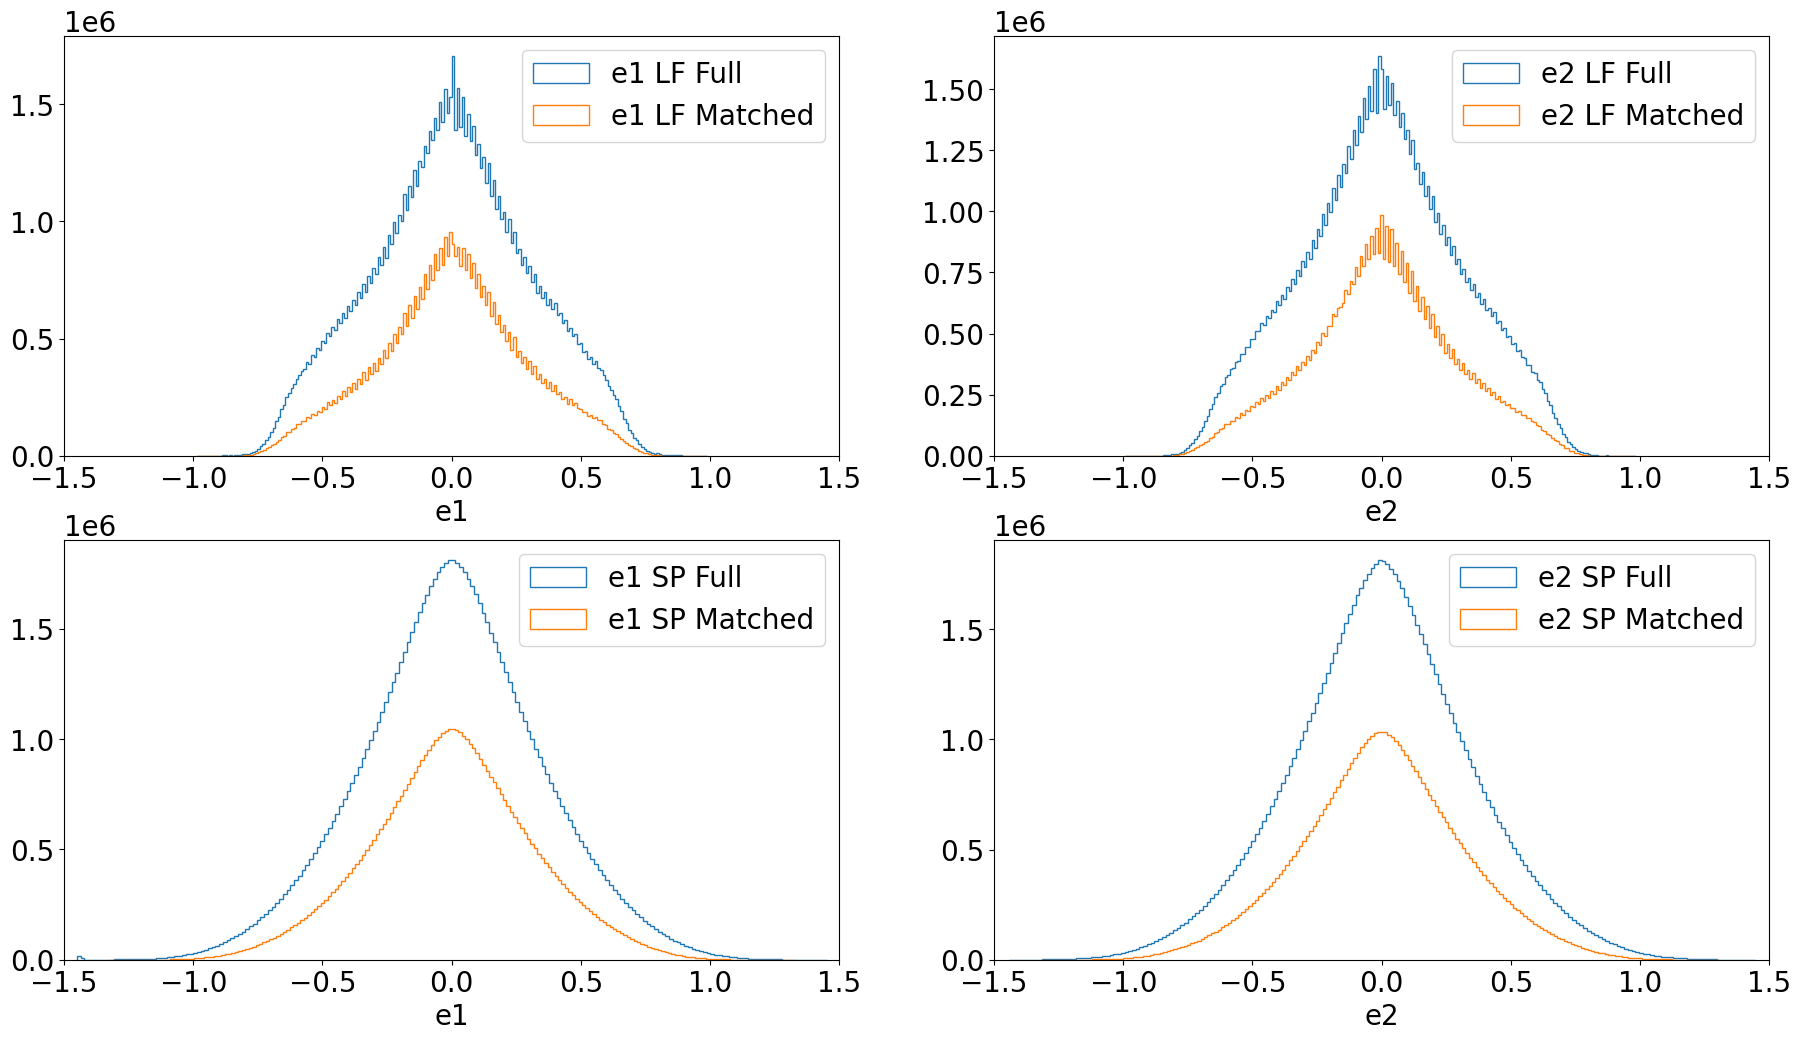

In [7]:
#Ellipticity histograms
plt.rcParams.update({'font.size': 20,'figure.figsize':[22,12]})
e1_1 = data1['e1']
e1_2 = data1['e2']
e2_1 = data2['e1']
e2_2 = data2['e2']

e3_1 = data3['e1']
e3_2 = data3['e2']
e4_1 = data4['e1']
e4_2 = data4['e2']

fig, axs = plt.subplots(2, 2)
nbins = 200

(n,bins,_)= axs[0,0].hist(e1_1, bins=nbins, density=False, histtype='step', weights=None,label='e1 LF Full')
(n,bins,_)= axs[0,0].hist(e3_1, bins=nbins, density=False, histtype='step', weights=None,label='e1 LF Matched')
axs[0,0].set_xlabel('e1')
axs[0,0].legend()
axs[0,0].set_xlim([-1.5,1.5])

(n,bins,_)= axs[0,1].hist(e1_2, bins=nbins, density=False, histtype='step', weights=None,label='e2 LF Full')
(n,bins,_)= axs[0,1].hist(e3_2, bins=nbins, density=False, histtype='step', weights=None,label='e2 LF Matched')
axs[0,1].set_xlabel('e2')
axs[0,1].legend()
axs[0,1].set_xlim([-1.5,1.5])

(n,bins,_)= axs[1,0].hist(e2_1, bins=nbins, density=False, histtype='step', weights=None,label='e1 SP Full')
(n,bins,_)= axs[1,0].hist(e4_1, bins=nbins, density=False, histtype='step', weights=None,label='e1 SP Matched')
axs[1,0].set_xlabel('e1')
axs[1,0].legend()
axs[1,0].set_xlim([-1.5,1.5])

(n,bins,_)= axs[1,1].hist(e2_2, bins=nbins, density=False, histtype='step', weights=None,label='e2 SP Full')
(n,bins,_)= axs[1,1].hist(e4_2, bins=nbins, density=False, histtype='step', weights=None,label='e2 SP Matched')
axs[1,1].set_xlabel('e2')
axs[1,1].legend()
axs[1,1].set_xlim([-1.5,1.5])

24.700000762939453


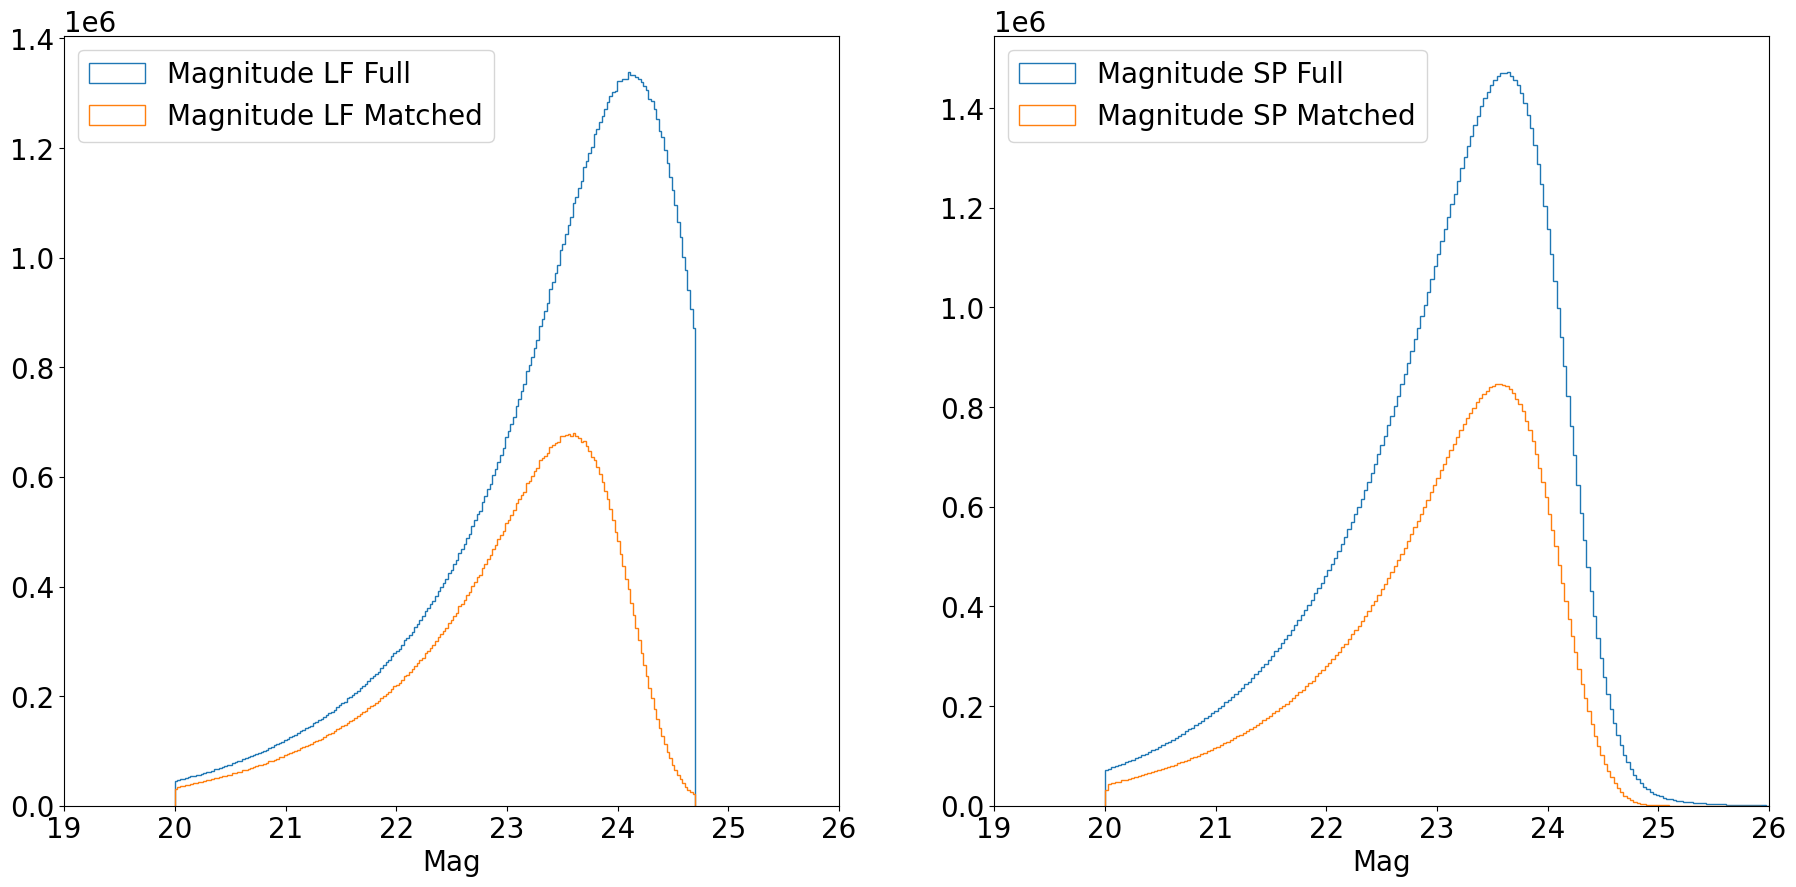

In [28]:
#Mag histograms

plt.rcParams.update({'font.size': 20,'figure.figsize':[22,10]})
mag_1 = data1['mag']
mag_2 = data2['mag']
mag_3 = data3['mag']
mag_4 = data4['mag']


fig, axs = plt.subplots(1, 2)
(n,bins,_)= axs[0].hist(mag_1, bins=200, density=False, histtype='step', weights=None,label='Magnitude LF Full')
(n,bins,_)= axs[0].hist(mag_3, bins=200, density=False, histtype='step', weights=None,label='Magnitude LF Matched')
print(max(mag_3))
axs[0].set_xlim([19,26])
axs[0].set_xlabel('Mag')
axs[0].legend(loc='upper left')

(n,bins,_)= axs[1].hist(mag_2, bins=200, density=False, histtype='step', weights=None,label='Magnitude SP Full')
(n,bins,_)= axs[1].hist(mag_4, bins=200, density=False, histtype='step', weights=None,label='Magnitude SP Matched')
axs[1].set_xlim([19,26])
axs[1].set_xlabel('Mag')
axs[1].legend(loc='upper left')


## Plot n(z)'s from file


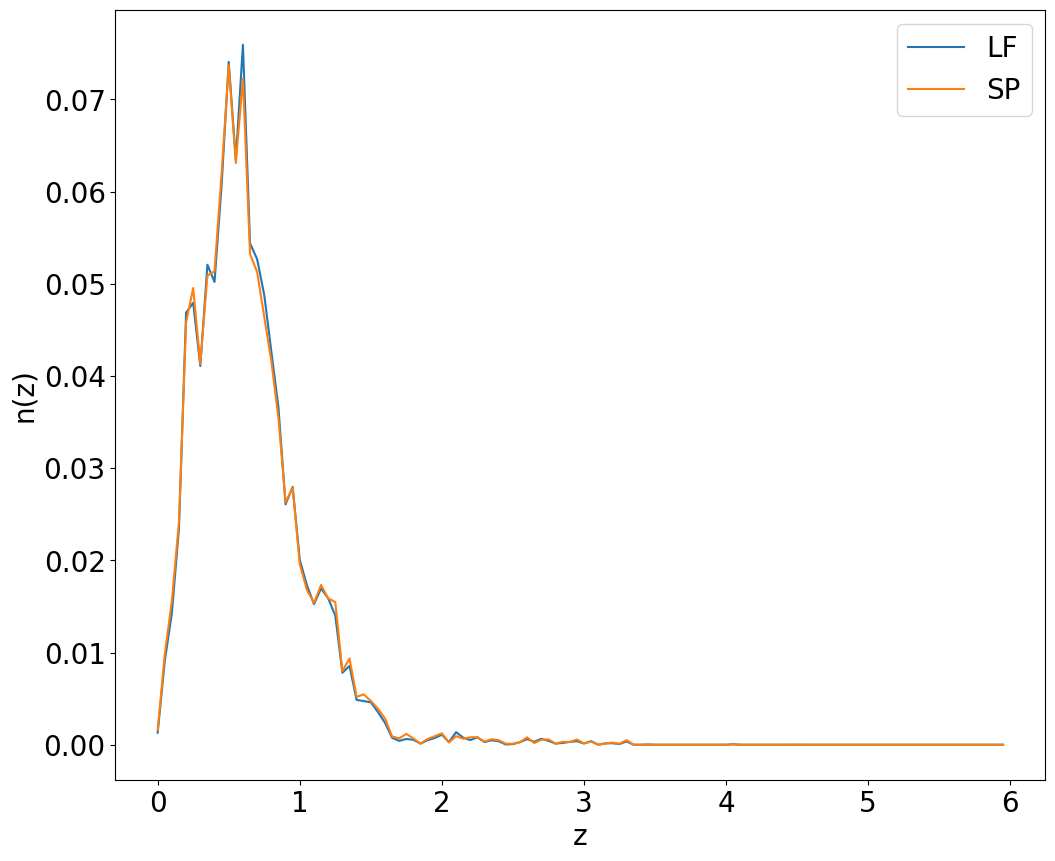

In [23]:
plt.rcParams.update({'font.size': 20,'figure.figsize':[12,10]})

plt.plot(data5['binstart'],data5['density'],label='LF')
plt.plot(data6['binstart'],data6['density'],label='SP')
plt.xlabel('z')
plt.ylabel('n(z)')
plt.legend()

np.savetxt('data/lensfit_matched/nz_lensfit_matched.txt',np.column_stack((data5['binstart'],data5['density'])))
np.savetxt('data/shapepipe_matched/nz_shapepipe_matched.txt',np.column_stack((data6['binstart'],data6['density'])))

In [29]:
blinds = ['A','B','C']
n_sp = []
n_lf = []
bins_sp = []
bins_lf = []

for blind in blinds:
    hdu = fits.open(nz_hdu1)
    z1 = hdu[1].data['Z_%s' %blind]

    (n,bins,_)= plt.hist(z1, bins=200, range=(0,5.0), density=True, histtype='step', weights=None,label='LensFit blind_%s' %blind)
    n_lf.append(list(n))
    bins_lf.append(list(bins))

    plt.xlabel('Redshifts')
    plt.ylabel('n(z)')
    print("zmin = ",min(z1))
    print("zmax = ",max(z1))
    plt.legend(fontsize=20)

    # plt.savefig('plots/Lensfit_nz_all_blinds.pdf' )
    plt.show()
    #####################################################################################################

    hdu = fits.open(nz_hdu2)
    z2 = hdu[1].data['Z_%s' %blind]

    (n,bins,_)= plt.hist(z2, bins=200, range=(0,5.0), density=True, histtype='step', weights=None,label='ShapePipe blind_%s' %blind)
    n_sp.append(list(n))
    bins_sp.append(list(bins))

    plt.xlabel('Redshifts')
    plt.ylabel('n(z)')
    print("zmin = ",min(z2))
    print("zmax = ",max(z2))
    plt.legend(fontsize=20)
    # plt.savefig('plots/Shapepipe_nz_all_blinds.pdf' )
    plt.show()



KeyError: "Key 'Z_A' does not exist."

## Compute shear-shear correlation

In [4]:
# Create TreeCorr catalogue LENSFIT
treecorr.set_omp_threads(8)

sep_units = 'arcmin'
theta_min = 1
theta_max = 200

TreeCorrConfig = {
        'ra_units': 'degrees',
        'dec_units': 'degrees',
        'max_sep': str(theta_max),
        'min_sep': str(theta_min),
        'sep_units': sep_units,
        'nbins': 20,
        'var_method':'jackknife',
    }

In [4]:
patches = data1['patch'] - 1
cat_gal1 = treecorr.Catalog(
    ra=data1['ra'],
    dec=data1['dec'],
    g1=data1['e1'],
    g2=data1['e2'],
    w=data1['w'],
    # patch=patches,
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg = treecorr.GGCorrelation(TreeCorrConfig)

gg.process(cat_gal1)
print("done")

done


In [5]:
# Create TreeCorr catalogue SHAPEPIPE
# idx = [i for i in range(len(data2['mag'])) if data2['mag'][i] > -24.7]
patches = data2['patch'] - 1
cat_gal2 = treecorr.Catalog(
    ra=data2['ra'][idx],
    dec=data2['dec'][idx],
    g1=data2['e1'][idx],
    g2=data2['e2'][idx],
    w=data2['w'][idx],
    # patch=patches,
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg2 = treecorr.GGCorrelation(TreeCorrConfig)

gg2.process(cat_gal2)
print("done")

done


In [5]:
# Create TreeCorr catalogue
cat_gal3 = treecorr.Catalog(
    ra=data3['ra'],
    dec=data3['dec'],
    g1=data3['e1']-3.939e-04,
    g2=data3['e2']-6.482e-04,
    w=data3['w'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg3 = treecorr.GGCorrelation(TreeCorrConfig)


gg3.process(cat_gal3)
print("done")

done


In [6]:
# Create TreeCorr catalogue
cat_gal4 = treecorr.Catalog(
    ra=data4['ra'],
    dec=data4['dec'],
    g1=data4['e1']+5.726e-04,
    g2=data4['e2']-8.218e-04,
    w=data4['w'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg4 = treecorr.GGCorrelation(TreeCorrConfig)

gg4.process(cat_gal4)
print("done")

The following patch numbers have no objects: {43}
This may be a problem depending on your use case.
done


In [9]:
# Create TreeCorr catalogue
cat_gal5 = treecorr.Catalog(
    ra=data3['ra'],
    dec=data3['dec'],
    g1=data4['e1']+0.00058401983805918,
    g2=data4['e2']-0.000835427364928420,
    w=data4['w'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg5 = treecorr.GGCorrelation(TreeCorrConfig)

gg5.process(cat_gal5)
print("done")

done


In [10]:
# Create TreeCorr catalogue
cat_gal6 = treecorr.Catalog(
    ra=data4['ra'],
    dec=data4['dec'],
    g1=data3['e1']-3.815e-04,
    g2=data3['e2']-7.235e-05,
    w=data3['w'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=50
)

gg6 = treecorr.GGCorrelation(TreeCorrConfig)


gg6.process(cat_gal6)
print("done")

done


/tmp/ipykernel_28169/2981299147.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


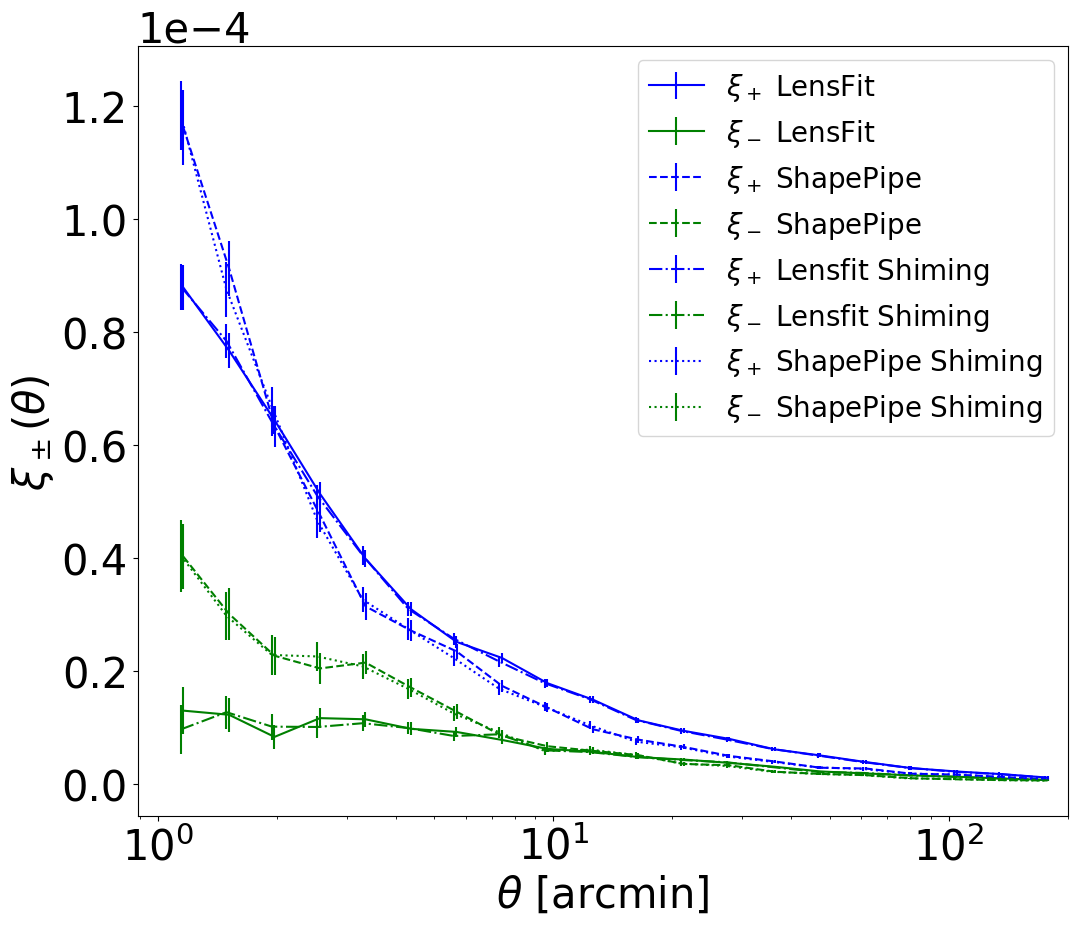

In [38]:
#VALIDATION WITH SHIMING'S RESULTS

plt.errorbar(gg.meanr, gg.xip, yerr=np.sqrt(gg.varxip), label=r'$\xi_+$ LensFit',ls='solid',color='b')
plt.errorbar(gg.meanr, gg.xim, yerr=np.sqrt(gg.varxim), label=r'$\xi_-$ LensFit',ls='solid',color='g')
plt.errorbar(gg2.meanr, gg2.xip, yerr=np.sqrt(gg2.varxip), label=r'$\xi_+$ ShapePipe',ls='dashed',color='b')
plt.errorbar(gg2.meanr, gg2.xim, yerr=np.sqrt(gg2.varxim), label=r'$\xi_-$ ShapePipe',ls='dashed',color='g')

shiming_lf = np.load(work_dir + '/lensfit_goldshape_2022v1_xipm20.npy')
shiming_sp = np.load(work_dir + '/unions_shapepipe_2022v1_xipm20.npy')

plt.errorbar(shiming_lf[:,0], shiming_lf[:,1], yerr=np.sqrt(shiming_lf[:,3]), label=r'$\xi_+$ Lensfit Shiming',ls='dashdot',color='b')
plt.errorbar(shiming_lf[:,0], shiming_lf[:,2], yerr=np.sqrt(shiming_lf[:,4]), label=r'$\xi_-$ Lensfit Shiming',ls='dashdot',color='g')
plt.errorbar(shiming_sp[:,0], shiming_sp[:,1], yerr=np.sqrt(shiming_sp[:,3]), label=r'$\xi_+$ ShapePipe Shiming',ls='dotted',color='b')
plt.errorbar(shiming_sp[:,0], shiming_sp[:,2], yerr=np.sqrt(shiming_sp[:,4]), label=r'$\xi_-$ ShapePipe Shiming',ls='dotted',color='g')

plt.plot()
plt.xscale('log')
plt.legend(fontsize=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(rf'$\theta$ [{sep_units}]')
plt.xlim([0,200])
_ = plt.ylabel(r'$\xi_\pm(\theta)$')
# plt.savefig('plots/xi_pm_3500.pdf')

/tmp/ipykernel_150256/549891517.py:18: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


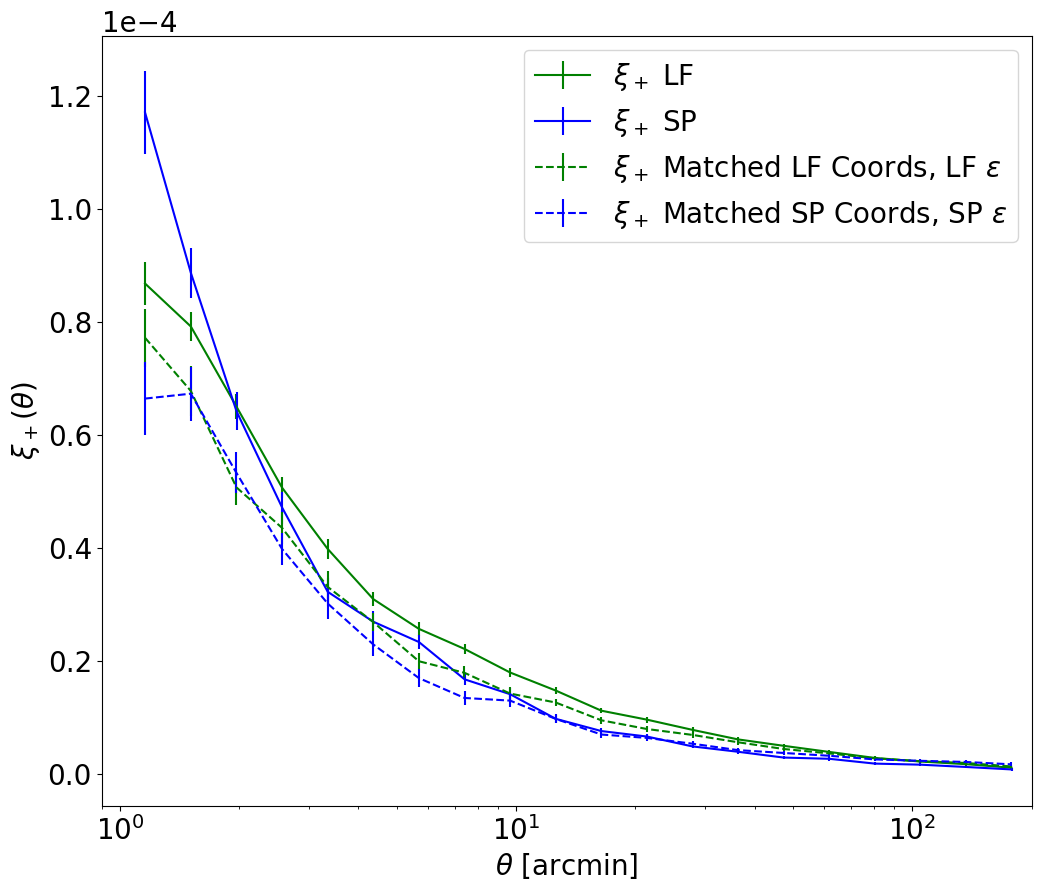

In [10]:
plt.rcParams.update({'font.size': 20,'figure.figsize':[12,10]})

plt.errorbar(gg.meanr, gg.xip, yerr=np.sqrt(gg.varxip), label=r'$\xi_+$ LF',ls='solid',color='g')
plt.errorbar(gg2.meanr, gg2.xip, yerr=np.sqrt(gg2.varxip), label=r'$\xi_+$ SP ',ls='solid',color='b')

plt.errorbar(gg3.meanr, gg3.xip, yerr=np.sqrt(gg3.varxip), label=r'$\xi_+$ Matched LF Coords, LF $\epsilon$',ls='dashed',color='g')
plt.errorbar(gg4.meanr, gg4.xip, yerr=np.sqrt(gg4.varxip), label=r'$\xi_+$ Matched SP Coords, SP $\epsilon$',ls='dashed',color='b')

# plt.errorbar(gg5.meanr, gg5.xip, yerr=np.sqrt(gg5.varxip), label=r'$\xi_+$ Matched LF Coords, SP $\epsilon$',ls='solid',color='r')
# plt.errorbar(gg6.meanr, gg6.xip, yerr=np.sqrt(gg6.varxip), label=r'$\xi_+$ Matched SP Coords, LF $\epsilon$',ls='dashed',color='r')

plt.plot()
plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(rf'$\theta$ [{sep_units}]')
plt.xlim([0,200])
# plt.ylim([0,1.5e-4])
_ = plt.ylabel(r'$\xi_+(\theta)$')
# plt.savefig('plots/xi_pm_3500.pdf')

/tmp/ipykernel_150256/2248501357.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


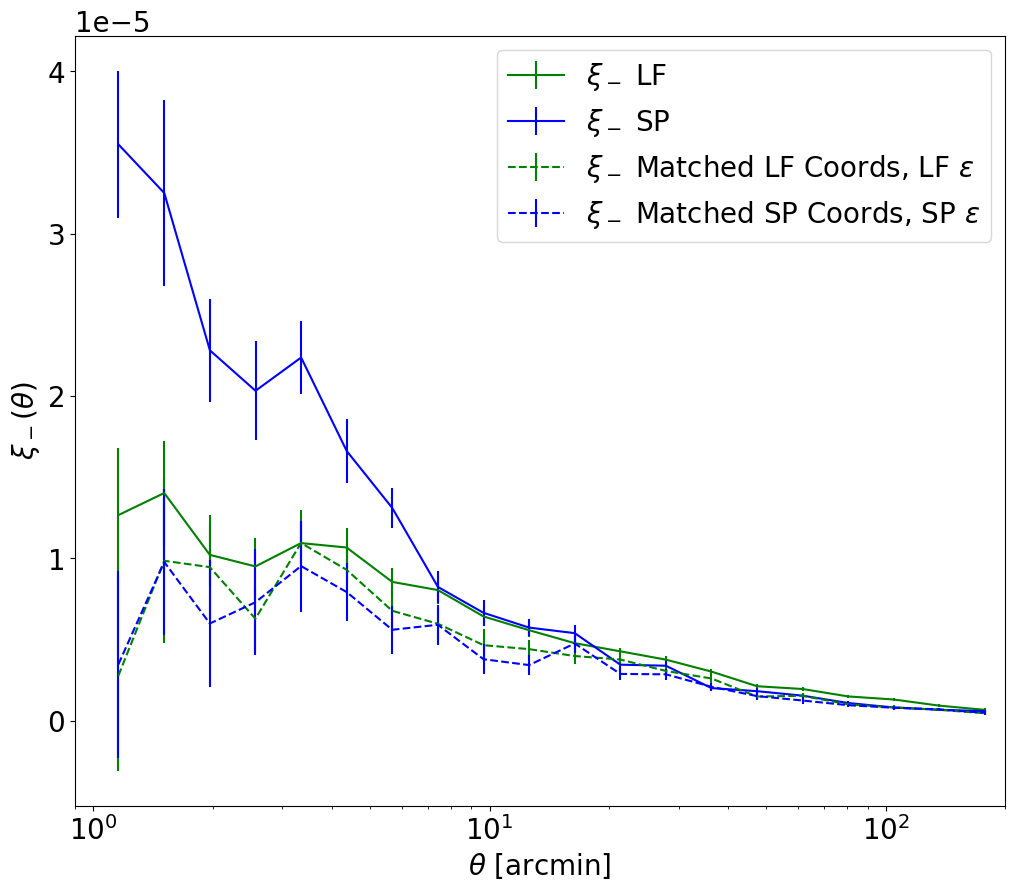

In [11]:
plt.errorbar(gg.meanr, gg.xim, yerr=np.sqrt(gg.varxim), label=r'$\xi_-$ LF',ls='solid',color='g')
plt.errorbar(gg2.meanr, gg2.xim, yerr=np.sqrt(gg2.varxim), label=r'$\xi_-$ SP',ls='solid',color='b')

plt.errorbar(gg3.meanr, gg3.xim, yerr=np.sqrt(gg3.varxim), label=r'$\xi_-$ Matched LF Coords, LF $\epsilon$',ls='dashed',color='g')
plt.errorbar(gg4.meanr, gg4.xim, yerr=np.sqrt(gg4.varxim), label=r'$\xi_-$ Matched SP Coords, SP $\epsilon$',ls='dashed',color='b')

# plt.errorbar(gg5.meanr, gg5.xim, yerr=np.sqrt(gg5.varxim), label=r'$\xi_-$ Matched LF Coords, SP $\epsilon$',ls='solid',color='r')
# plt.errorbar(gg6.meanr, gg6.xim, yerr=np.sqrt(gg6.varxim), label=r'$\xi_-$ Matched SP Coords, LF $\epsilon$',ls='dashed',color='r')

plt.plot()
plt.xscale('log')
# plt.yscale('log')
plt.legend(fontsize=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(rf'$\theta$ [{sep_units}]')
plt.xlim([0,200])
# plt.ylim([0,1.5e-4])
_ = plt.ylabel(r'$\xi_-(\theta)$')
# plt.savefig('plots/xi_pm_3500.pdf')

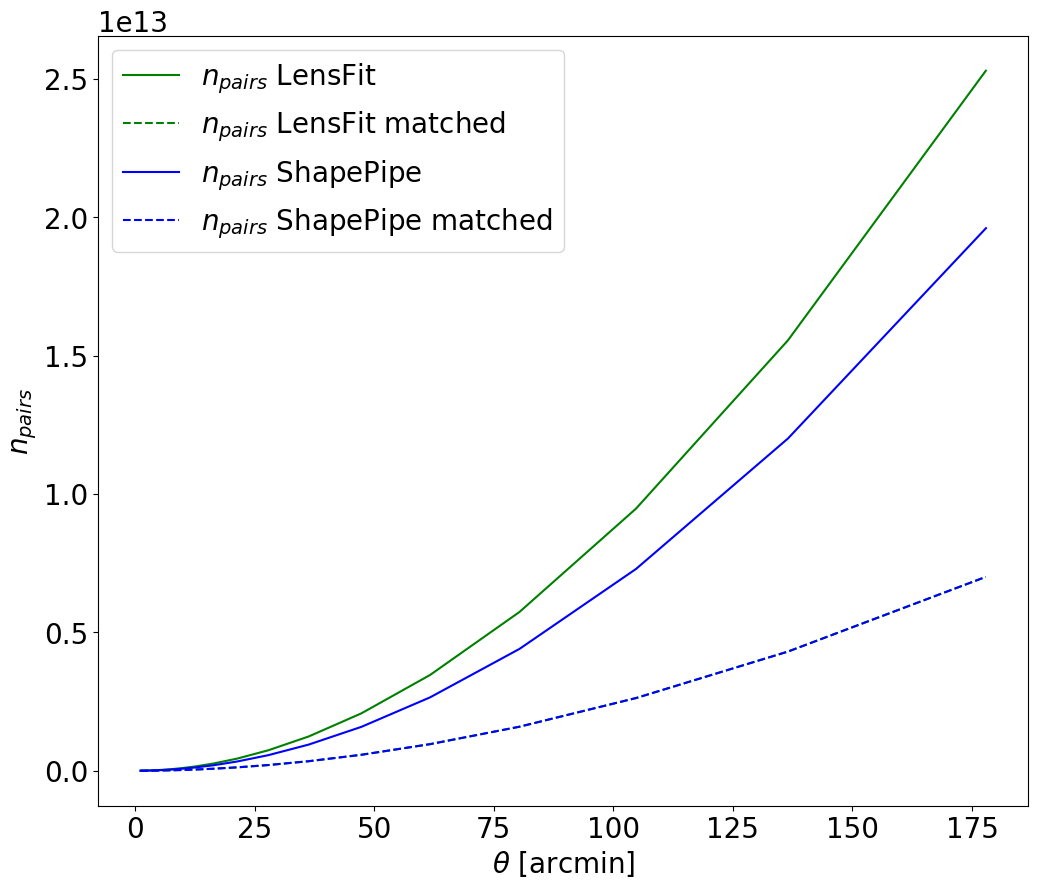

In [41]:
plt.plot(gg.meanr, gg.npairs, label=r'$n_{pairs}$ LensFit',ls='solid',color='g')
plt.plot(gg3.meanr, gg3.npairs, label=r'$n_{pairs}$ LensFit matched',ls='dashed',color='g')

plt.plot(gg2.meanr, gg2.npairs, label=r'$n_{pairs}$ ShapePipe',ls='solid',color='b')
plt.plot(gg4.meanr, gg4.npairs, label=r'$n_{pairs}$ ShapePipe matched',ls='dashed',color='b')

plt.xlabel(rf'$\theta$ [{sep_units}]')
plt.ylabel(r'$n_{pairs}$')
plt.legend()

## Comparison with theory PyCCL

In [21]:
def theory_cls(Omega_c, Omega_b, h,n_s,sigma_8):
        #Set cosmology
    cosmo = ccl.Cosmology(Omega_c, Omega_b, h, n_s,sigma_8)

    ell = np.arange(2, 2000)
    theta_deg = np.logspace(np.log10(theta_min/60), np.log10(theta_max/60), num=20) # Theta is in degrees
    #CALCULATION OF THEORY XI_PM
    xi_plus_lf = []
    xi_minus_lf = []

    for i in range(len(n_lf)):
        bias_ia = 0*np.ones_like(bins_lf[i][:-1])
        lens_ia = ccl.WeakLensingTracer(cosmo, dndz =(np.array(bins_sp[i][:-1]), np.array(n_sp[i])), ia_bias = (np.array(bins_sp[i][:-1]),bias_ia))
        cl = ccl.angular_cl(cosmo, lens_ia, lens_ia, ell)

        xi_plus_lf.append(list(ccl.correlation(cosmo, ell, cl, theta_deg, type='GG+', method='FFTLog')))
        xi_minus_lf.append(list(ccl.correlation(cosmo, ell, cl, theta_deg, type='GG-', method='FFTLog')))


    style = [':','--','-.']
    plt.errorbar(gg3.meanr, gg3.xip, yerr=np.sqrt(gg3.varxip), ls='', label=r'$\xi_+$ TreeCorr (LF)',capsize=5,marker='o',color='b')
    plt.errorbar(gg3.meanr, gg3.xim, yerr=np.sqrt(gg3.varxim), ls='', label=r'$\xi_-$ TreeCorr (LF)',capsize=5,marker='o',color='g')


    for i in range(len(blinds)):
        plt.plot(theta_deg*60,xi_plus_lf[i],color='b', ls=style[i], label=r'$\xi_+$ PyCCL (LF) blind %s' %blinds[i])
        plt.plot(theta_deg*60,xi_minus_lf[i],color='g', ls=style[i], label=r'$\xi_-$ PyCCL (LF) blind %s' %blinds[i])

    plt.xscale('log')
    # plt.yscale('log')
    plt.legend(fontsize=20)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim([1,200])
    plt.ylim([0,10e-5])
    plt.ylabel(r'$\xi_\pm(\theta)$')
    plt.xlabel(r'$\theta$ [arcmin]')
    # plt.savefig('plots/pyccl_comparison_lensfit.pdf')



interact(theory_cls,
        Omega_c=widgets.FloatSlider(value=0.26,
                                               min=0.01,
                                               max=0.5,
                                               step=0.01,
                                  description=r'$\Omega_c$'),
        Omega_b=widgets.FloatSlider(value=0.04,
                                               min=0.001,
                                               max=0.07,
                                               step=0.001,
                                  description=r'$\Omega_b$'),
        h=widgets.FloatSlider(value=0.7,
                                               min=0.3,
                                               max=0.9,
                                               step=0.01,
                                  description=r'$h$'),

        n_s=widgets.FloatSlider(value=0.96,
                                               min=0.6,
                                               max=1.1,
                                               step=0.01,
                                  description=r'$n_s$'),
        sigma_8=widgets.FloatSlider(value=0.8,
                                               min=0.3,
                                               max=1.2,
                                               step=0.01,
                                  description=r'$\sigma_8$'))


interactive(children=(FloatSlider(value=0.26, description='$\\Omega_c$', max=0.5, min=0.01, step=0.01), FloatS…

<function __main__.theory_cls(Omega_c, Omega_b, h, n_s, sigma_8)>

In [ ]:
def theory_cls(Omega_c, Omega_b, h,n_s,sigma_8):
        #Set cosmology
    cosmo = ccl.Cosmology(Omega_c, Omega_b, h, n_s,sigma_8)

    ell = np.arange(2, 2000)
    theta_deg = np.logspace(np.log10(theta_min/60), np.log10(theta_max/60), num=50) # Theta is in degrees
    #CALCULATION OF THEORY XI_PM
    xi_plus_sp = []
    xi_minus_sp = []

    for i in range(len(n_sp)):

        bias_ia = 0*np.ones_like(bins_sp[i][:-1])
        lens_ia = ccl.WeakLensingTracer(cosmo, dndz =(np.array(bins_sp[i][:-1]), np.array(n_sp[i])), ia_bias = (np.array(bins_sp[i][:-1]),bias_ia))
        cl = ccl.angular_cl(cosmo, lens_ia, lens_ia, ell)

        xi_plus_sp.append(list(ccl.correlation(cosmo, ell, cl, theta_deg, type='GG+', method='FFTLog')))
        xi_minus_sp.append(list(ccl.correlation(cosmo, ell, cl, theta_deg, type='GG-', method='FFTLog')))


    style = [':','--','-.']
    plt.errorbar(gg2.meanr, gg2.xip, yerr=np.sqrt(gg.varxip), ls='', label=r'$\xi_+$ TreeCorr (SP)',capsize=5,marker='o',color='b')
    plt.errorbar(gg2.meanr, gg2.xim, yerr=np.sqrt(gg.varxim), ls='', label=r'$\xi_-$ TreeCorr (SP)',capsize=5,marker='o',color='g')


    for i in range(len(blinds)):
        plt.plot(theta_deg*60,xi_plus_sp[i],color='b', ls=style[i], label=r'$\xi_+$ PyCCL (SP) blind %s' %blinds[i])
        plt.plot(theta_deg*60,xi_minus_sp[i],color='g', ls=style[i], label=r'$\xi_-$ PyCCL (SP) blind %s' %blinds[i])

    plt.xscale('log')
    # plt.yscale('log')
    plt.legend(fontsize=20)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xlim([1,200])
    plt.ylim([0,10e-5])
    plt.ylabel(r'$\xi_\pm(\theta)$')
    plt.xlabel(r'$\theta$ [arcmin]')
    # plt.savefig('plots/pyccl_comparison_lensfit.pdf')



interact(theory_cls,
        Omega_c=widgets.FloatSlider(value=0.26,
                                               min=0.01,
                                               max=0.5,
                                               step=0.01,
                                  description=r'$\Omega_c$'),
        Omega_b=widgets.FloatSlider(value=0.04,
                                               min=0.001,
                                               max=0.07,
                                               step=0.001,
                                  description=r'$\Omega_b$'),
        h=widgets.FloatSlider(value=0.7,
                                               min=0.3,
                                               max=0.9,
                                               step=0.01,
                                  description=r'$h$'),

        n_s=widgets.FloatSlider(value=0.96,
                                               min=0.6,
                                               max=1.1,
                                               step=0.01,
                                  description=r'$n_s$'),
        sigma_8=widgets.FloatSlider(value=0.8,
                                               min=0.3,
                                               max=1.2,
                                               step=0.01,
                                  description=r'$\sigma_8$'))



## Plot varxipm's
Error bars are computed by treecorr, either through the 'shot' or 'jackknife' method.

In [7]:
jack_varxip1 = gg3.varxip
jack_varxim1 = gg3.varxim

jack_varxip2 = gg4.varxip
jack_varxim2 = gg4.varxim

tc_cov_lf = gg3.estimate_cov('jackknife')
tc_cov_sp = gg4.estimate_cov('jackknife')


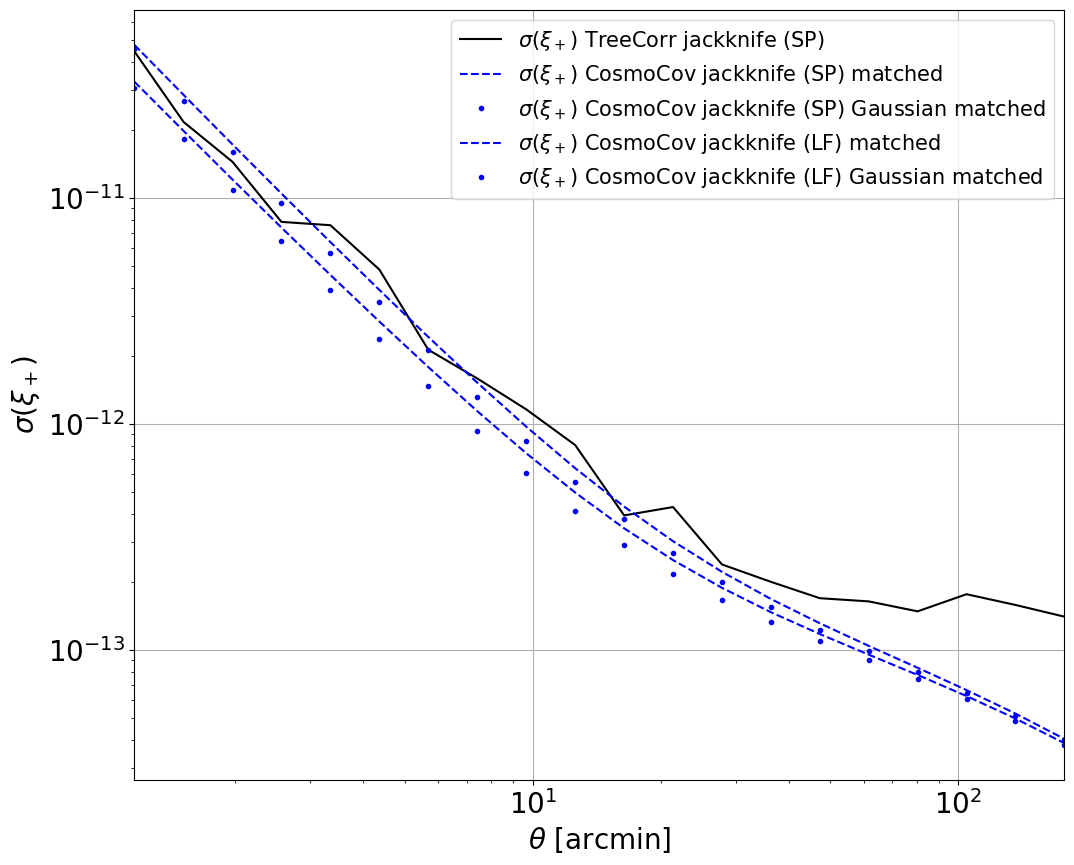

In [10]:
plt.rcParams.update({'font.size': 20,'figure.figsize':[12,10]})
#Plot fractional difference in covmat estimation (LensFit)
colour=['b','r','g']
i=0

plt.plot(gg4.meanr,jack_varxip2,'-k', label=r'$\sigma(\xi_+)$ TreeCorr jackknife (SP)')
for blind in ['matched']:
    
    cc=np.loadtxt('data/shapepipe_%s/covs/cov_shapepipe_%s.txt' %(blind,blind))
    cc_var = np.diag(cc)
    cc_varxip_sp = cc_var[:20]
    
    cc_g=np.loadtxt('data/shapepipe_%s/covs/cov_shapepipe_%s_g.txt' %(blind,blind))
    cc_var = np.diag(cc_g)
    cc_varxip_sp_g = cc_var[:20]


    plt.plot(gg4.meanr,cc_varxip_sp,'--%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (SP) %s' %blind)
    plt.plot(gg4.meanr,cc_varxip_sp_g,'.%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (SP) Gaussian %s' %blind)

    cc=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s.txt' %(blind,blind))
    cc_var = np.diag(cc)
    cc_varxip_lf = cc_var[:20]
    
    cc_g=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s_g.txt' %(blind,blind))
    cc_var = np.diag(cc_g)
    cc_varxip_lf_g = cc_var[:20]

    plt.plot(gg3.meanr,cc_varxip_lf,'--%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (LF) %s' %blind)
    plt.plot(gg3.meanr,cc_varxip_lf_g,'.%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (LF) Gaussian %s' %blind)

    plt.grid()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([gg4.meanr[0],gg4.meanr[-1]])
    plt.legend(fontsize=15)
    plt.xlabel(rf'$\theta$ [{sep_units}]')
    plt.ylabel(r'$\sigma(\xi_+)$')
    i +=1


plt.savefig('plots/covmat_comparison_sp_xip.pdf',bbox_inches='tight')
plt.show()

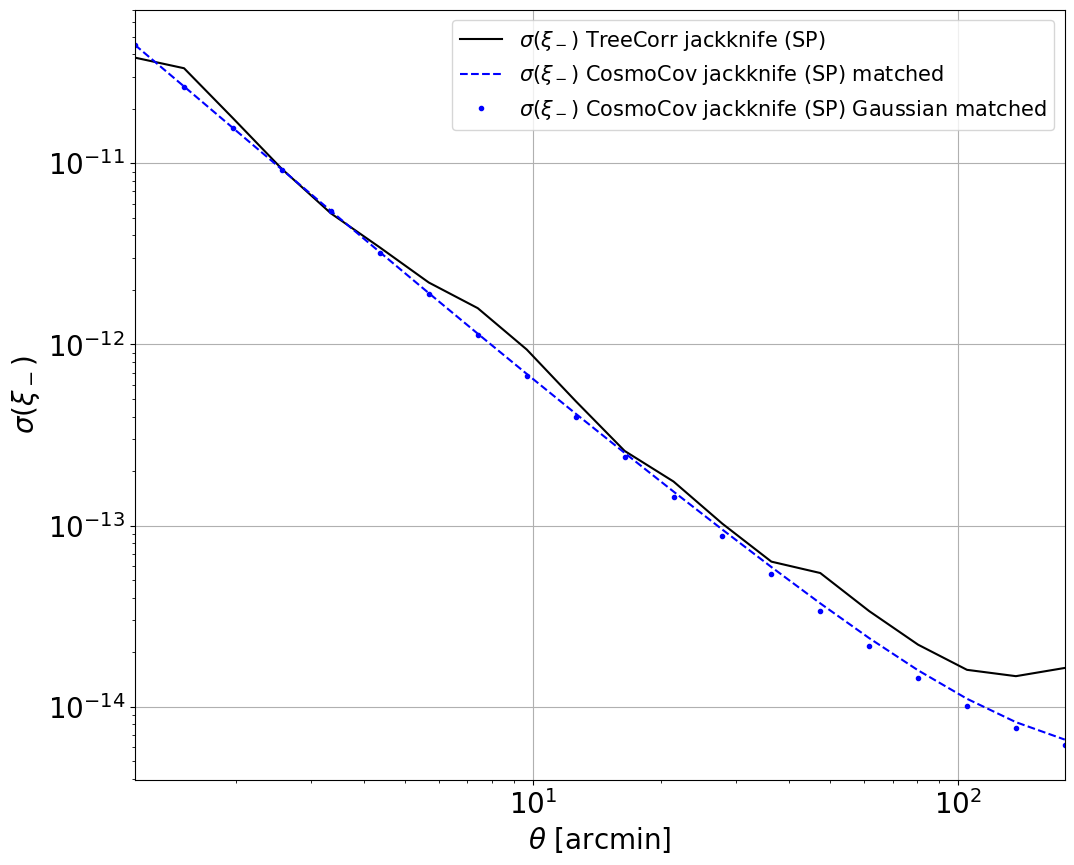

In [24]:
i=0

plt.plot(gg4.meanr,jack_varxim2,'-k', label=r'$\sigma(\xi_-)$ TreeCorr jackknife (SP)')
for blind in ['matched']:
    
    cc=np.loadtxt('data/shapepipe_%s/covs/cov_shapepipe_%s.txt' %(blind,blind))
    cc_var = np.diag(cc)
    cc_varxim_sp = cc_var[20:]
    
    cc_g=np.loadtxt('data/shapepipe_%s/covs/cov_shapepipe_%s_g.txt' %(blind,blind))
    cc_var = np.diag(cc_g)
    cc_varxim_sp_g = cc_var[20:]


    plt.plot(gg4.meanr,cc_varxim_sp,'--%s' %colour[i], label=r'$\sigma(\xi_-)$ CosmoCov jackknife (SP) %s' %blind)
    plt.plot(gg4.meanr,cc_varxim_sp_g,'.%s' %colour[i], label=r'$\sigma(\xi_-)$ CosmoCov jackknife (SP) Gaussian %s' %blind)
    plt.hlines(0,color='black',xmin=gg4.meanr[0],xmax=gg4.meanr[-1])
    plt.grid()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([gg4.meanr[0],gg4.meanr[-1]])
    plt.legend(fontsize=15)
    plt.xlabel(rf'$\theta$ [{sep_units}]')
    plt.ylabel(r'$\sigma(\xi_-)$')
    i +=1

plt.savefig('plots/covmat_comparison_sp_xim.pdf',bbox_inches='tight')
plt.show()


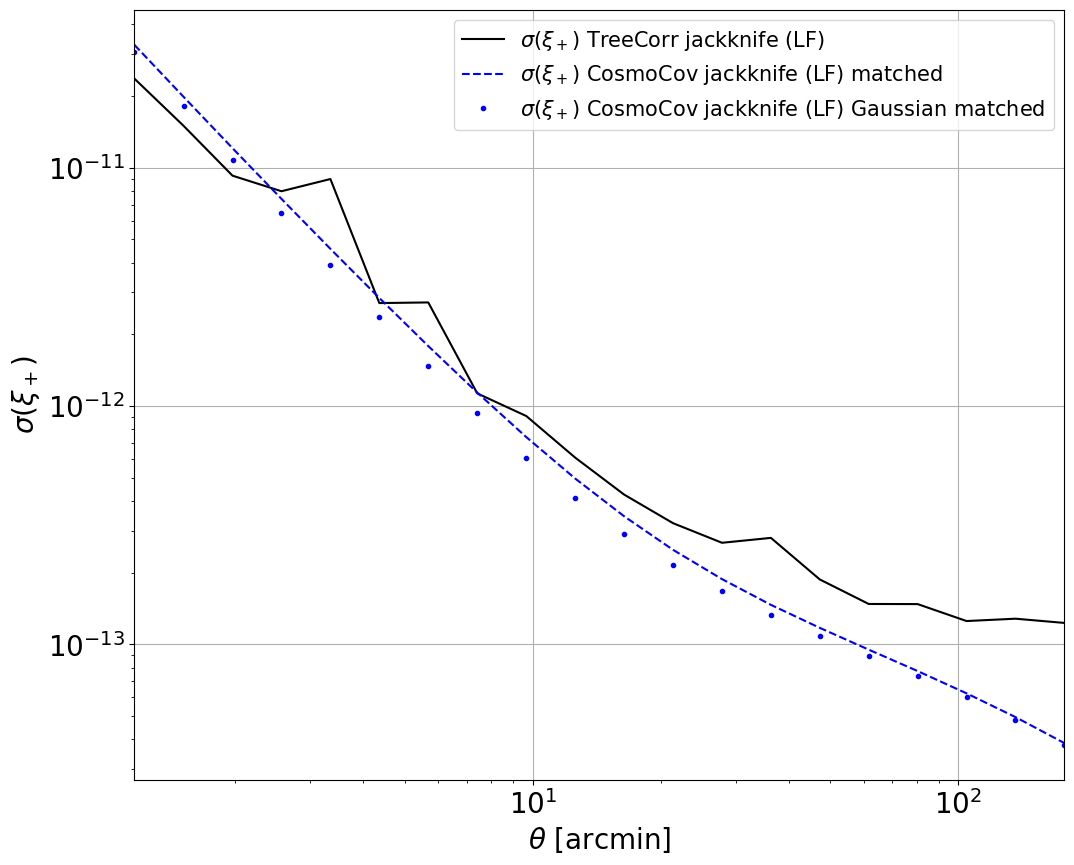

In [25]:
#Plot fractional difference in covmat estimation (LensFit)
colour=['b','r','g']
i=0

plt.plot(gg3.meanr,jack_varxip1,'-k', label=r'$\sigma(\xi_+)$ TreeCorr jackknife (LF)')
for blind in ['matched']:
    cc=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s.txt' %(blind,blind))
    cc_var = np.diag(cc)
    cc_varxip_lf = cc_var[:20]
    
    cc_g=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s_g.txt' %(blind,blind))
    cc_var = np.diag(cc_g)
    cc_varxip_lf_g = cc_var[:20]

    plt.plot(gg3.meanr,cc_varxip_lf,'--%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (LF) %s' %blind)
    plt.plot(gg3.meanr,cc_varxip_lf_g,'.%s' %colour[i], label=r'$\sigma(\xi_+)$ CosmoCov jackknife (LF) Gaussian %s' %blind)

    plt.grid()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([gg3.meanr[0],gg3.meanr[-1]])
    plt.legend(fontsize=15)
    plt.xlabel(rf'$\theta$ [{sep_units}]')
    plt.ylabel(r'$\sigma(\xi_+)$')
    i +=1


plt.savefig('plots/covmat_comparison_lf_xip.pdf',bbox_inches='tight')
plt.show()

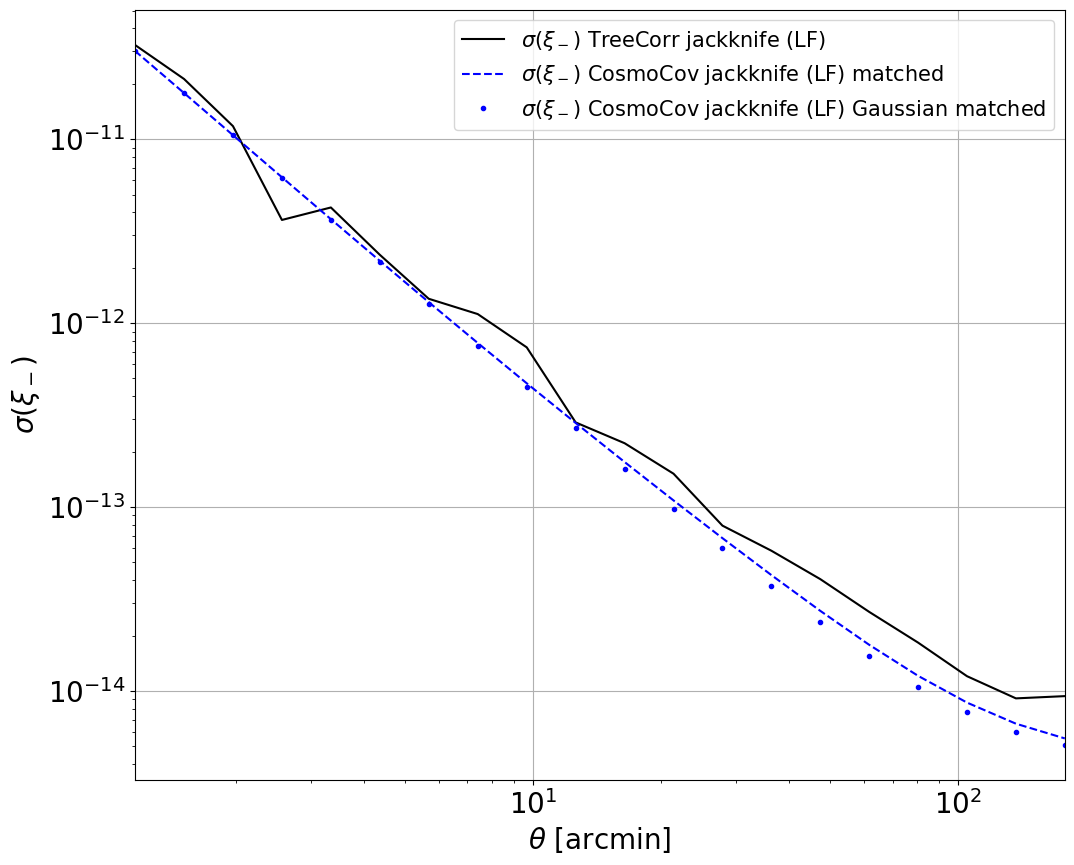

In [27]:
#Plot fractional difference in covmat estimation (LensFit)
colour=['b','r','g']
i=0

plt.plot(gg3.meanr,jack_varxim1,'-k', label=r'$\sigma(\xi_-)$ TreeCorr jackknife (LF)')
for blind in ['matched']:
    cc=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s.txt' %(blind,blind))
    cc_var = np.diag(cc)
    cc_varxim_lf = cc_var[20:]
    
    cc_g=np.loadtxt('data/lensfit_%s/covs/cov_lensfit_%s_g.txt' %(blind,blind))
    cc_var = np.diag(cc_g)
    cc_varxim_lf_g = cc_var[20:]

    
    plt.plot(gg3.meanr,cc_varxim_lf,'--%s' %colour[i], label=r'$\sigma(\xi_-)$ CosmoCov jackknife (LF) %s' %blind)
    plt.plot(gg3.meanr,cc_varxim_lf_g,'.%s' %colour[i], label=r'$\sigma(\xi_-)$ CosmoCov jackknife (LF) Gaussian %s' %blind)
    plt.grid()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim([gg3.meanr[0],gg3.meanr[-1]])
    plt.legend(fontsize=15)
    plt.xlabel(rf'$\theta$ [{sep_units}]')
    plt.ylabel(r'$\sigma(\xi_-)$')
    i +=1


plt.savefig('plots/covmat_comparison_lf_xim.pdf',bbox_inches='tight')
plt.show()

## Run systematic tests

### C_sys

In [ ]:
#CALCULATE XI_SYS FOR SHAPEPIPE

sep_units = 'arcmin'
theta_min = 1
theta_max = 200
hdu4[1].header

TreeCorrConfig = {
        'ra_units': 'degrees',
        'dec_units': 'degrees',
        'max_sep': str(theta_max),
        'min_sep': str(theta_min),
        'sep_units': sep_units,
        'nbins': 20,
        'var_method':'jackknife',
    }

cat_psf = treecorr.Catalog(
    ra=data4['RA'],
    dec=data4['DEC'],
    g1=data4['E1_PSF_HSM'],
    g2=data4['E2_PSF_HSM'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=500
)

cat_star = treecorr.Catalog(
    ra=data2['ra'],
    dec=data2['dec'],
    g1=data2['e1'],
    g2=-data2['e2'],
    w=data2['w'],
    ra_units='degrees',
    dec_units='degrees',
    npatch=500
)

gg_psf = treecorr.GGCorrelation(TreeCorrConfig)
gg_psf_star = treecorr.GGCorrelation(TreeCorrConfig)

gg_psf.process(cat_psf)
gg_psf_star.process(cat_star,cat_psf)
print("done")

In [ ]:
C_sys_xip = (gg_psf_star.xip)**2/gg_psf.xip
C_sys_xim = (gg_psf_star.xim)**2/gg_psf.xim

delta_C_sys_xip = C_sys_xip*np.sqrt((2*np.sqrt(gg_psf_star.varxip)/gg_psf_star.xip)**2+(np.sqrt(gg_psf.varxip)/gg_psf.xip)**2)
delta_C_sys_xim = C_sys_xim*np.sqrt((2*np.sqrt(gg_psf_star.varxim)/gg_psf_star.xim)**2+(np.sqrt(gg_psf.varxim)/gg_psf.xim)**2)

In [ ]:
plt.errorbar(gg_psf_star.meanr, C_sys_xip, yerr=delta_C_sys_xip, label=r'$(\xi^{sys}_+)$',color='b')
plt.legend()
plt.xlabel(r'$\theta[arcmin]$')
plt.ylabel(r'$\xi^{sys}_\pm$')
# plt.ylim([-2e-8,2e-8])
plt.xscale('log')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)

In [ ]:
plt.errorbar(gg_psf_star.meanr, C_sys_xim, yerr=delta_C_sys_xim, label=r'$(\xi^{sys}_-)$',color='g')
plt.legend()
plt.xlabel(r'$\theta[arcmin]$')
plt.ylabel(r'$\xi^{sys}_\pm$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ylim([-2e-8,2e-8])
plt.xscale('log')
plt.grid(True)

### M_ap

In [ ]:
R = gg3.rnom

(Map_lf,mapsq_im_lf,Mx_lf,mxsq_im_lf,varMapsq_lf) = gg3.calculateMapSq(R=R,m2_uform='Schneider')
(Map_sp,mapsq_im_sp,Mx_sp,mxsq_im_sp,varMapsq_sp) = gg4.calculateMapSq(R=R,m2_uform='Schneider')

In [ ]:
plt.errorbar(R, Map_lf, yerr=np.sqrt(varMapsq_lf), label=r'$<M^2_{ap}>$ LF',ls=':',color='b')
plt.errorbar(R, Mx_lf, yerr=np.sqrt(varMapsq_lf), label=r'$<M^2_{x}>$ LF',ls=':',color='r')
plt.axhline(y=0,xmin=0,xmax=200,color='k')
plt.xlabel(r'$\theta[arcmin]$')
plt.ylabel(r'$<M^2>$')
plt.xscale('log')
plt.ylim([-2e-5,1e-5])
# plt.xlim([1,200])
plt.grid(True)
plt.legend()

In [ ]:
plt.errorbar(R, Map_sp, yerr=np.sqrt(varMapsq_sp), label=r'$<M^2_{ap}>$ SP',ls=':',color='b')
plt.errorbar(R, Mx_sp, yerr=np.sqrt(varMapsq_sp), label=r'$<M^2_{x}>$ SP',ls=':',color='r')
plt.axhline(y=0,xmin=0,xmax=200,color='k')
plt.xscale('log')
plt.xlabel(r'$\theta[arcmin]$')
plt.ylabel(r'$<M^2>$')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylim([-2e-5,1e-5])
plt.grid(True)
plt.legend()

In [ ]:
plt.errorbar(gg.rnom, Map_lf/Map_sp, yerr=np.sqrt(varMapsq_lf*2), label=r'$<M^2_{ap}>$ LF/SP',ls=':',color='b')
plt.errorbar(gg.rnom, Mx_lf/Map_sp, yerr=np.sqrt(varMapsq_lf*2), label=r'$<M^2_{x}>$ LF/SP',ls=':',color='r')
# plt.plot(gg.rnom,Map_lf/Map_sp)
plt.legend()
plt.axhline(y=1,xmin=0,xmax=200,color='k')
plt.xscale('log')
plt.xlabel(r'$\theta[arcmin]$')
plt.xlim([0,210])
plt.ylabel(r'$<M^2>$')
# plt.ylim([-0.5,2])
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True)